# <span style="color:darkorange"> Exercises 03 (NSL) </span>
# <span style="color:darkorange"> 03.1: European or 'plain vanilla' option pricing </span>

The wide field of application of Monte Carlo simulation encompasses <font color="darkorange">economics</font> as well.

Assuming a <font color="darkorange">European option</font> is stipulated, its price today ($t=0$) may be estimated through a Monte Carlo simulation.

The agreement for assigning the price is <font color="darkorange">risk minimization</font>, i.e. <font color="darkorange">the price</font> of the option, in average, <font color="darkorange">should not benefit either partner</font>.


The simulation parameters are fixed

|        parameter          |        value          |
| ---------------: | :-------------------: |
| asset starting price $S(t=0)$ | $100$ |
| delivery time $T$ | $1$ |
| strike price $K$ | $100$ |
| risk-free interest rate $r$ | $0.1$ |
| volatility $\sigma$ | $0.25$ |
| $\#$ of simulations | $10^5$ |
| $\#$ of blocks | $10^2$ |

and the the European <font color="darkorange">call-option</font> price $C[S(0),0]=E\left[e^{-rT}\max\{0,\left(S(T)-K\right)\right]$, and <font color="darkorange">put-option</font> price, $P[S(0),0]=E\left[e^{-rT}\max\{0,\left(K-S(T)\right)\}\right]$, <font color="darkorange">at time $t=0$</font>, are computed by means of:

1. <font color="darkorange"> direct sampling </font> of the final asset price $S(T)$ for a $GBM(r,\sigma^2)$ (geometric brownian motion);

2. <font color="darkorange"> discretized path sampling</font> ($GBM(r,\sigma^2)$) of the asset price,
dividing $[0,T]$ into $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$.

**Note:** 
* the recursive formula used for <font color="darkorange">sampling</font> discretized values of  <font color="darkorange">$S\sim GBM(r,\sigma^2)$</font> at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$.

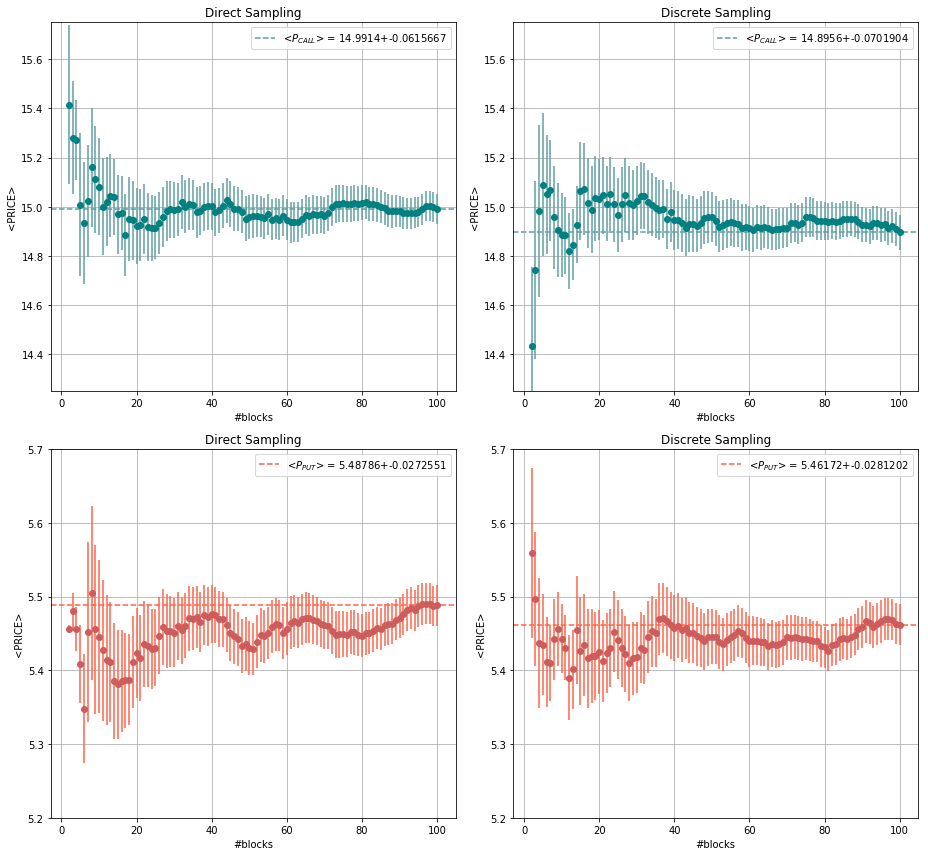

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Plot 1
x_direct_CALL = np.arange(2, len(open('ave_CALL_direct.dat').readlines()) + 2)
y_direct_CALL = np.loadtxt('ave_CALL_direct.dat')
error_bars_direct_CALL = np.loadtxt('sigma_CALL_direct.dat')

plt.figure(figsize=(13, 12))

# Left Column - Direct Sampling
plt.subplot(2, 2, 1)
mean_integral_direct_CALL = y_direct_CALL[-1]
error_direct_CALL = error_bars_direct_CALL[-1]
plt.axhline(y=mean_integral_direct_CALL, color='cadetblue', label='<$P_{CALL}$> = '+str(mean_integral_direct_CALL)+'+-'+str(error_direct_CALL), ls='dashed' ) 
plt.errorbar(x_direct_CALL, y_direct_CALL, yerr=error_bars_direct_CALL, fmt='o', color='teal', ecolor='cadetblue')
plt.xlabel('#blocks')
plt.ylabel('<PRICE>')
plt.ylim(14.25,15.75)
plt.title('Direct Sampling')
plt.legend()
plt.grid(True)

# Plot 2
x_discrete_CALL = np.arange(2, len(open('ave_CALL_discrete.dat').readlines()) + 2)
y_discrete_CALL = np.loadtxt('ave_CALL_discrete.dat')
error_bars_discrete_CALL = np.loadtxt('sigma_CALL_discrete.dat')

# Right Column - Discrete Sampling
plt.subplot(2, 2, 2)
mean_integral_discrete_CALL = y_discrete_CALL[-1]
error_discrete_CALL = error_bars_discrete_CALL[-1]
plt.axhline(y=mean_integral_discrete_CALL, color='cadetblue', label='<$P_{CALL}$> = '+str(mean_integral_discrete_CALL)+'+-'+str(error_discrete_CALL), ls='dashed' ) 
plt.errorbar(x_discrete_CALL, y_discrete_CALL, yerr=error_bars_discrete_CALL, fmt='o', color='teal', ecolor='cadetblue')
plt.xlabel('#blocks')
plt.ylabel('<PRICE>')
plt.ylim(14.25,15.75)
plt.title('Discrete Sampling')
plt.legend()
plt.grid(True)

# Plot 3
x_direct_put = np.arange(2, len(open('ave_PUT_direct.dat').readlines()) + 2)
y_direct_put = np.loadtxt('ave_PUT_direct.dat')
error_bars_direct_put = np.loadtxt('sigma_PUT_direct.dat')

# Left Column - Direct Sampling
plt.subplot(2, 2, 3)
mean_integral_direct_put = y_direct_put[-1]
error_direct_put = error_bars_direct_put[-1]
plt.axhline(y=mean_integral_direct_put, color='tomato', label='<$P_{PUT}$> = '+str(mean_integral_direct_put)+'+-'+str(error_direct_put), ls='dashed' ) 
plt.errorbar(x_direct_put, y_direct_put, yerr=error_bars_direct_put, fmt='o', color='indianred', ecolor='tomato')
plt.xlabel('#blocks')
plt.ylabel('<PRICE>')
plt.ylim(5.2,5.7)
plt.title('Direct Sampling')
plt.legend()
plt.grid(True)

# Plot 4
x_discrete_put = np.arange(2, len(open('ave_PUT_discrete.dat').readlines()) + 2)
y_discrete_put = np.loadtxt('ave_PUT_discrete.dat')
error_bars_discrete_put = np.loadtxt('sigma_PUT_discrete.dat')

# Right Column - Discrete Sampling
plt.subplot(2, 2, 4)
mean_integral_discrete_put = y_discrete_put[-1]
error_discrete_put = error_bars_discrete_put[-1]
plt.axhline(y=mean_integral_discrete_put, color='tomato', label='<$P_{PUT}$> = '+str(mean_integral_discrete_put)+'+-'+str(error_discrete_put), ls='dashed' ) 
plt.errorbar(x_discrete_put, y_discrete_put, yerr=error_bars_discrete_put, fmt='o', color='indianred', ecolor='tomato')
plt.xlabel('#blocks')
plt.ylabel('<PRICE>')
plt.ylim(5.2,5.7)
plt.title('Discrete Sampling')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
